In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Basic scatterplot — relationship between bill and tip

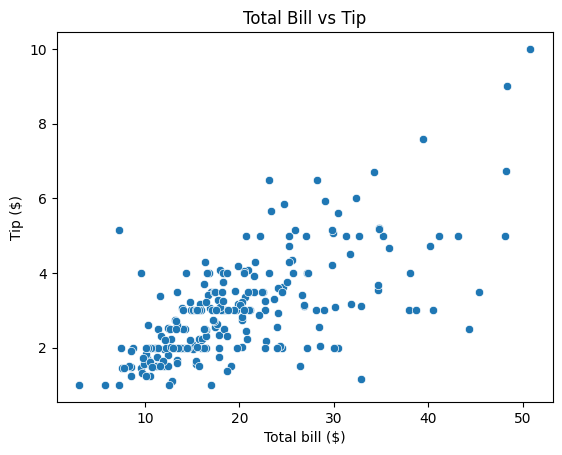

In [3]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.title('Total Bill vs Tip')
plt.xlabel('Total bill ($)')
plt.ylabel('Tip ($)')
plt.show()

- A scatterplot shows each bill as a dot.
- x = bill amount, 
- y = tip amount. 
- Look: do dots slope upward? 
- That means bigger bills -> bigger tips.

### 2. Add semantic mappings (hue, style, size)

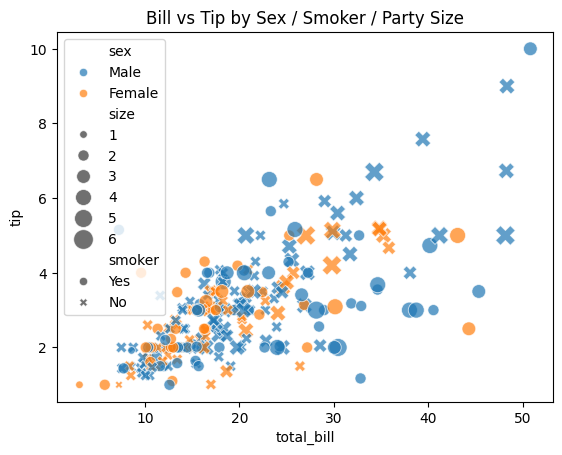

In [ ]:
sns.scatterplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='sex', # color by gender
    style='smoker', # different marker for smoker/non-smoker
    size='size',
    sizes=(30, 200), # min & max marker size
    alpha=0.7
)

plt.title('Bill vs Tip by Sex / Smoker / Party Size')
plt.show()

- hue = color;
- style = shape;
- size = marker area.
- This helps compare subgroups at a glance.

### 3. Trend line — regplot (linear fit / smoothing)

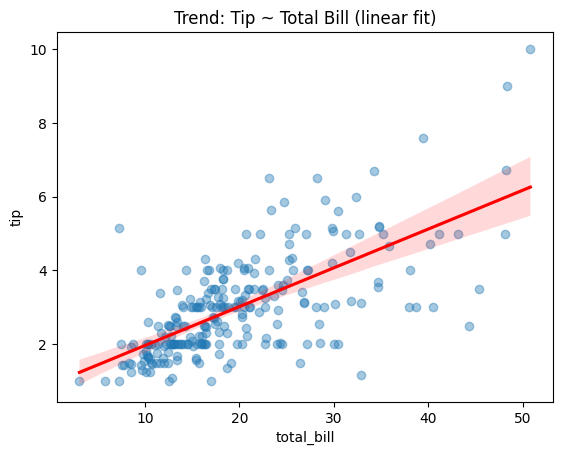

In [11]:
sns.regplot(data=tips, x='total_bill', y='tip', scatter_kws={'alpha':0.4}, line_kws={'color': 'red'} )
plt.title('Trend: Tip ~ Total Bill (linear fit)')
plt.show()

- regplot draws a straight trend line with a shaded band. It shows that tips go up as the total bill goes up.

### 4. Fast pairwise scan — pairplot

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


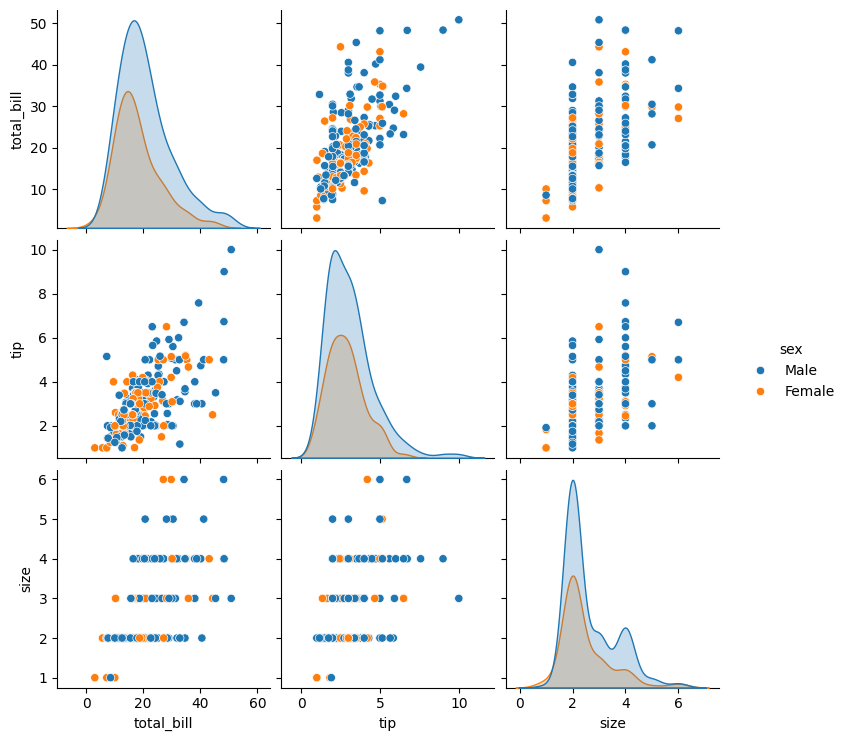

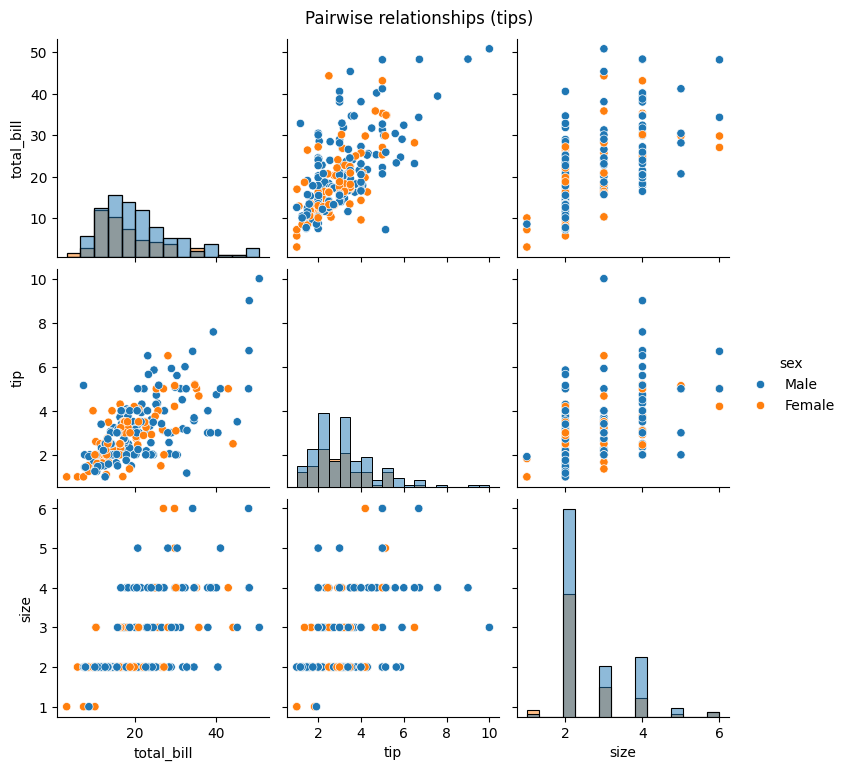

In [ ]:
sns.pairplot(tips, hue='sex')
sns.pairplot(tips, hue='sex', diag_kind='hist') # Diagonal shows one variable’s distribution, off-diagonal shows relation between two variables.
plt.suptitle('Pairwise relationships (tips)', y=1.02)
plt.show()

- Pairplot makes a grid of all numbers against each other. The diagonal shows each variable’s spread, and the other boxes show how two variables move together.

### 5. How to compute the quick stats / checks (code you should run)

In [21]:
# correlation
corr = tips['total_bill'].corr(tips['tip'])
print('corr total_bill vs tip =', corr)

# average bill & tip by time (Lunch/Dinner)
print(tips.groupby('time')[['total_bill','tip']].mean())

# tip percentage and group by size
tips = tips.copy()
tips['tip_pct'] = tips['tip'] / tips['total_bill']
print(tips.groupby('size')['tip_pct'].mean().reset_index())

corr total_bill vs tip = 0.6757341092113645
        total_bill       tip
time                        
Lunch    17.168676  2.728088
Dinner   20.797159  3.102670
   size   tip_pct
0     1  0.217292
1     2  0.165719
2     3  0.152157
3     4  0.145949
4     5  0.141495
5     6  0.156229


C:\Users\HP\AppData\Local\Temp\ipykernel_8140\2781257507.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips.groupby('time')[['total_bill','tip']].mean())


- Run these to get exact numbers — correlation, group means, tip percentage.